---
---
## Data cleaning

In [1]:
# Import the organization modules
import pandas as pd
import numpy as np
# Import module to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Import the plot modules
import matplotlib.pyplot as plt
import seaborn as sns
# Import own scripts
from scripts.data_cleaning import (
    read_all_csvs, 
    clean_data,
    create_csv
    )

In [2]:
# Create data frame from all single CSV files
df = read_all_csvs()
# Clean the data
df = clean_data(df)

## Baseline model

In [3]:
# Import 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, fbeta_score

### Dummy Classifier

In [4]:
features = df.columns.to_list()
features.remove('state')
X = df[features]
y = df.state

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [11]:
# Use DummyClassifier as a baseline model
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
y_pred_train = dummy_clf.predict(X_train)


print("f_beta_score: ", fbeta_score(y_test, y_pred, beta = 2, average = 'macro').round(2))

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)

f_beta_score:  0.43
Accuracy on train set: 0.53
Accuracy on test set: 0.53
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

      failed       0.00      0.00      0.00     25014
  successful       0.53      1.00      0.69     28378

    accuracy                           0.53     53392
   macro avg       0.27      0.50      0.35     53392
weighted avg       0.28      0.53      0.37     53392

--------------------------------------------------------------------------------


In [13]:
def dummy_classifier():
    # Imports 
    from sklearn.dummy import DummyClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, fbeta_score

    # Split the data
    features = df.columns.to_list()
    features.remove('state')
    X = df[features]
    y = df.state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

    # Use DummyClassifier as a baseline model
    dummy_clf = DummyClassifier(strategy="prior")
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    y_pred_train = dummy_clf.predict(X_train)

    # Print f_beta
    print("f_beta_score: ", fbeta_score(y_test, y_pred, beta = 2, average = 'macro').round(2))

    # Print accuracy of our model
    print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
    print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
    print("--------"*10)

    # Print classification report of our model
    print(classification_report(y_test, y_pred))
    print("--------"*10)

    # Evaluate the model with a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    ## Create the Confusion Matrix Display Object(cmd_obj). Note the 
    ## alphabetical sorting order of the labels.
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['failed', 'succesful'])
    ## The plot() function has to be called for the sklearn visualization
    ## code to do its work and the Axes object to be created.
    fig, ax = plt.subplots(figsize=(10,10))

    ## Set the color
    cmd_obj.plot(ax=ax, cmap = 'Blues')
    ## Use the Axes attribute 'ax_' to get to the underlying Axes object.
    ## The Axes object controls the labels for the X and the Y axes. It
    ## also controls the title.
    cmd_obj.ax_.set(
                    title='Baseline model prediction of kickstarter projects', 
                    xlabel='Predicted State', 
                    ylabel='Actual States',
                    )
    ## Finally, call the matplotlib show() function to display the visualization
    ## of the Confusion Matrix.
    plt.show()

    
    

### Simple logistic regression

In [7]:
# Logistic Regression
log_reg = LogisticRegression(max_iter = 5)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)



In [12]:
# Print fbeta_score
print("f_beta_score: ", fbeta_score(y_test, y_pred, beta = 2, average = 'macro').round(2))

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

f_beta_score:  0.43
Accuracy on train set: 0.53
Accuracy on test set: 0.53
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

      failed       0.00      0.00      0.00     25014
  successful       0.53      1.00      0.69     28378

    accuracy                           0.53     53392
   macro avg       0.27      0.50      0.35     53392
weighted avg       0.28      0.53      0.37     53392

--------------------------------------------------------------------------------


In [9]:
# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)

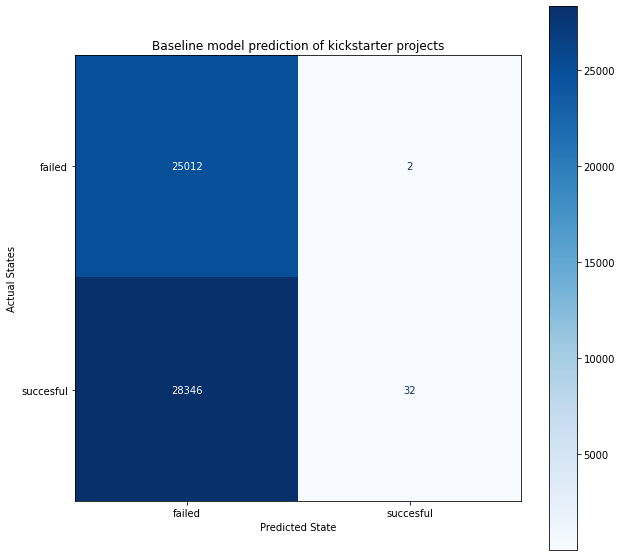

In [10]:
## Create the Confusion Matrix Display Object(cmd_obj). Note the 
## alphabetical sorting order of the labels.
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['failed', 'succesful'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
fig, ax = plt.subplots(figsize=(10,10))

## Set the color
cmd_obj.plot(ax=ax, cmap = 'Blues')
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Baseline model prediction of kickstarter projects', 
                xlabel='Predicted State', 
                ylabel='Actual States',
                )
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

f_beta_score:  0.43
Accuracy on train set: 0.53
Accuracy on test set: 0.53
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

      failed       0.00      0.00      0.00     25014
  successful       0.53      1.00      0.69     28378

    accuracy                           0.53     53392
   macro avg       0.27      0.50      0.35     53392
weighted avg       0.28      0.53      0.37     53392

--------------------------------------------------------------------------------


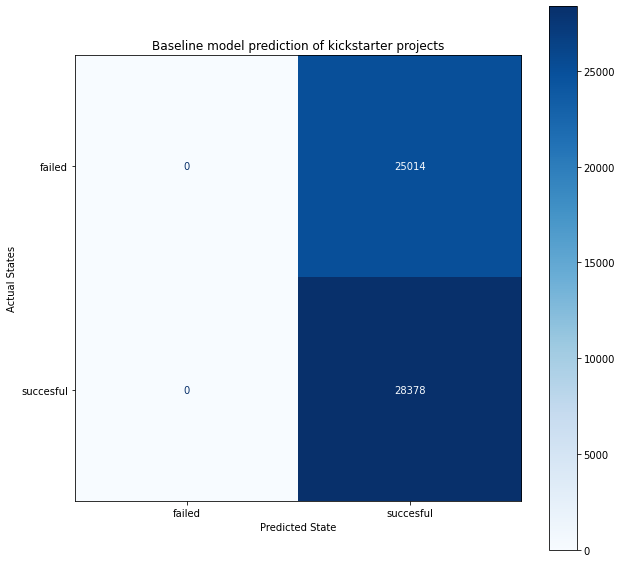

In [14]:
dummy_classifier()